#  Chapter 2. Exercises

# Properties of estimator
Let $(X_1,X_2,...,X_m)$ be a Monte Carlo simulation, i.i.d. with expectation $\mu$ and standard deviation $\sigma$. Let $\bar X_m=\frac 1 m \sum_{i=1}^m X_i $ be an estimator of Monte Carlo mean

Prove the following formulas 

$$ \mathbb{E}(\bar X_m)=\mu$$
$$ sd(\bar X_m)=\frac{\sigma}{\sqrt m}$$

Solution:

$$ \mathbb{E}(\bar X_m)=\mathbb{E}\left(\frac 1 m \sum_{i=1}^m X_i\right)=\frac 1 m \sum_{i=1}^m\mathbb{E}\left( X_i\right)=\mu$$

$$ var(\bar X_m)=var\left(\frac 1 m \sum_{i=1}^m X_i\right)=\frac {1}{m^2}var\left( \sum_{i=1}^m X_i\right)=\frac {1}{m^2}\sum_{i=1}^mvar\left(  X_i\right)=\frac {1}{m}\sigma^2$$

therefore

$$ sd(\bar X_m)=\frac{\sigma}{\sqrt m}$$

## Log-normal densities
Prove the formulas for the expected value, variance and density for log-normal distribution with parameters $\mu$ and $\sigma$

#### Solutions
##### Density

$Y \sim N(\mu,\sigma), \quad X=e^Y$

$\mathbb P(X\leq t)=\mathbb P(Y\leq \ln t)=$
$\int_{-\infty}^{\ln t}\frac{1}{\sqrt{2\pi}\sigma}\exp{-\frac{(x-\mu)^2}{2\sigma^2}}dx$

Let $x=\ln u$, then $dx=\frac{1}{u}du$.

Then $\mathbb P(X\leq t)=\int_{-\infty}^{t}\frac{1}{u\sqrt{2\pi}\sigma}\exp{-\frac{(\ln u-\mu)^2}{2\sigma^2}}du$

##### Expected Value
$Y \sim N(\mu,\sigma), \quad X=e^Y$

$\mathbb E(X)=\mathbb E(e^Y)=\int_{-\infty}^{\infty}e^x\frac{1}{\sqrt{2\pi}\sigma}\exp{-\frac{(x-\mu)^2}{2\sigma^2}}dx=
\int_{-\infty}^{\infty}\frac{1}{\sqrt{2\pi}\sigma}\exp{\frac{2x\sigma^2-x^2+2x\mu-\mu^2}{2\sigma^2}}dx=
\int_{-\infty}^{\infty}\frac{1}{\sqrt{2\pi}\sigma}\exp{\frac{-x^2+2x(\sigma^2+\mu)-(\sigma^2+\mu)^2+(\sigma^2+\mu)^2-\mu^2}{2\sigma^2}}dx=
$

$\int_{-\infty}^{\infty}\frac{1}{\sqrt{2\pi}\sigma}\exp{\frac{-(x-(\sigma^2+\mu))^2}{2\sigma^2}}dx \exp(\mu+\sigma^2/2)=\exp(\mu+\sigma^2/2)$

##### Variance 
$Y \sim N(\mu,\sigma), \quad X=e^Y$

$\mathbb E(X^2)=\mathbb E(e^{2Y})=\int_{-\infty}^{\infty}e^{2x}\frac{1}{\sqrt{2\pi}\sigma}\exp{-\frac{(x-\mu)^2}{2\sigma^2}}dx=
\int_{-\infty}^{\infty}\frac{1}{\sqrt{2\pi}\sigma}\exp{\frac{4x\sigma^2-x^2+2x\mu-\mu^2}{2\sigma^2}}dx=
\int_{-\infty}^{\infty}\frac{1}{\sqrt{2\pi}\sigma}\exp{\frac{-x^2+2x(2\sigma^2+\mu)-(2\sigma^2+\mu)^2+(2\sigma^2+\mu)^2-\mu^2}{2\sigma^2}}dx=
$

$\int_{-\infty}^{\infty}\frac{1}{\sqrt{2\pi}\sigma}\exp{\frac{-(x-(2\sigma^2+\mu))^2}{2\sigma^2}}dx \exp(2\mu+2\sigma^2)=\exp(2\mu+2\sigma^2)=\exp(2\mu+\sigma^2)\exp(\sigma^2)=\mathbb E(X)^2\exp(\sigma^2)$


$var(X)=\mathbb E(X^2)-\mathbb E(X)^2=\mathbb E(X)^2(\sigma^2-1)$

## Example 2.2.3/Figure 2.1

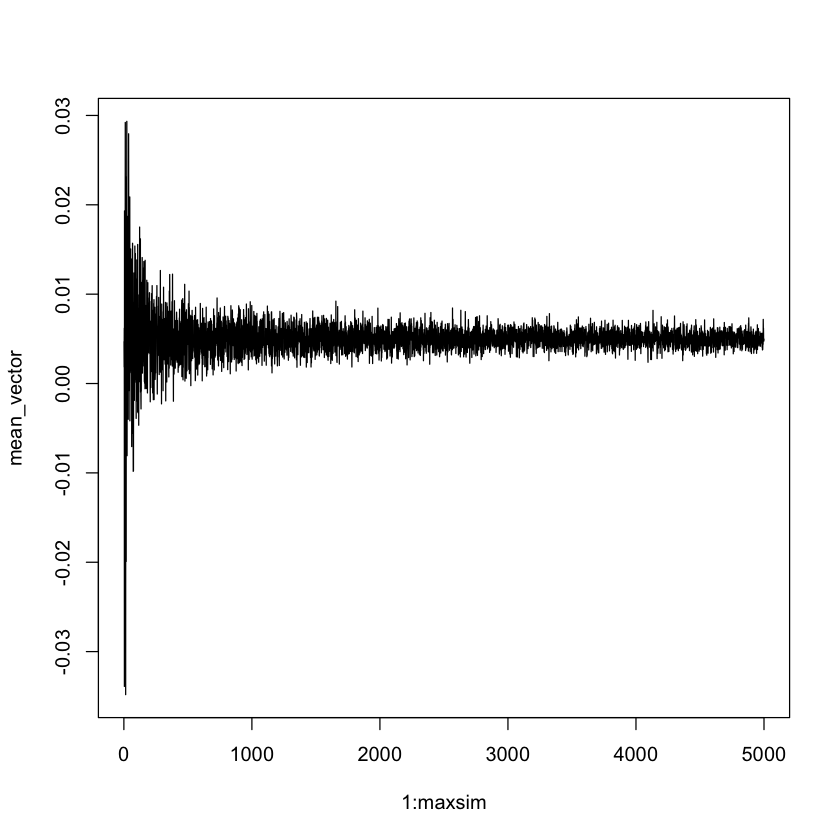

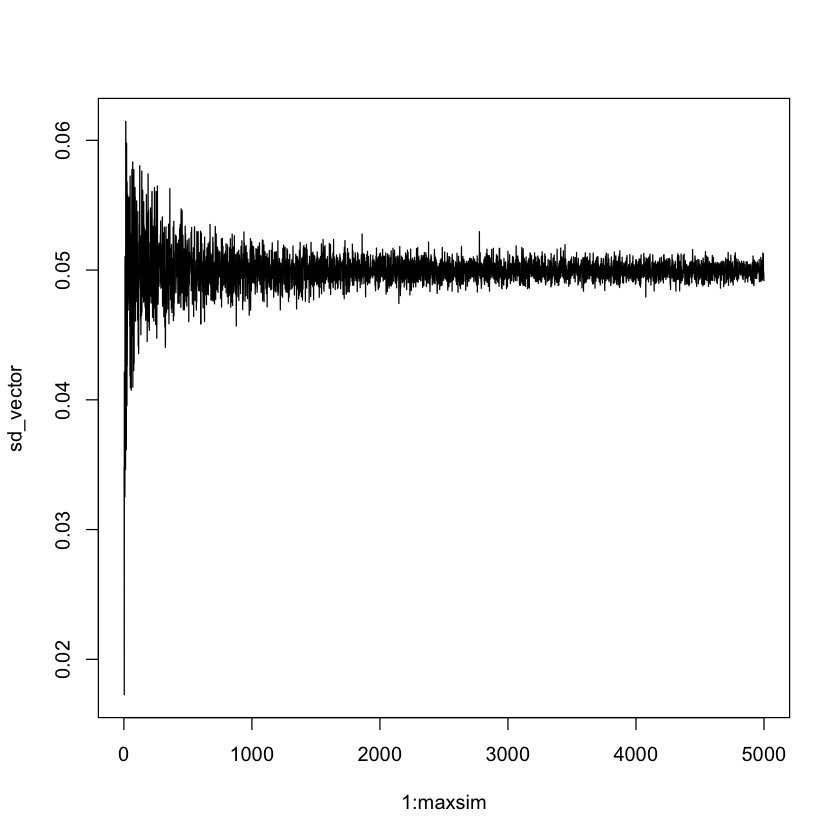

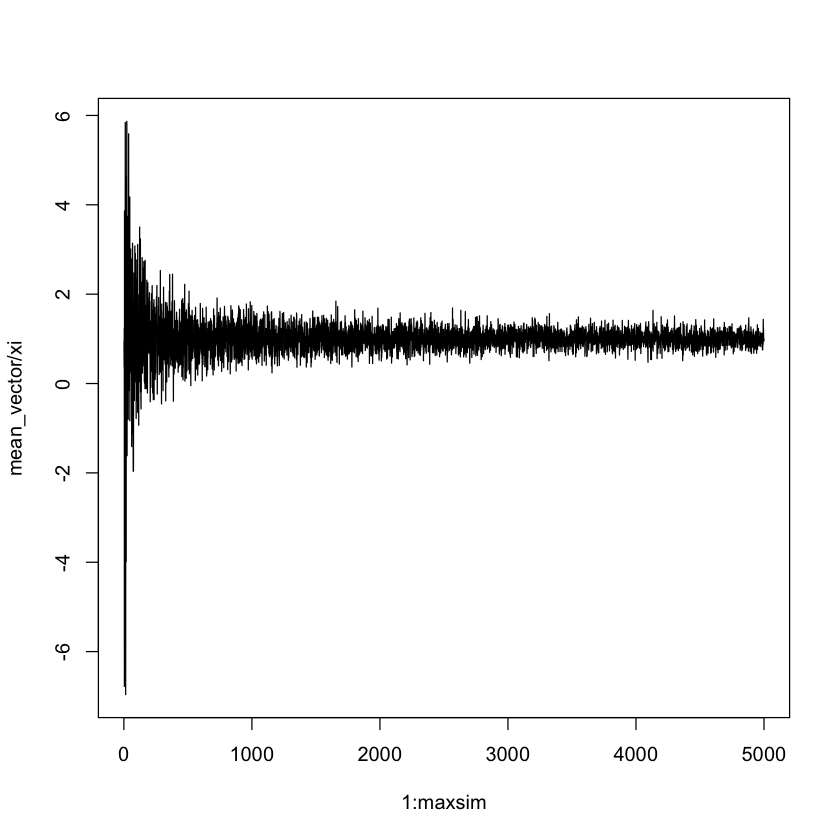

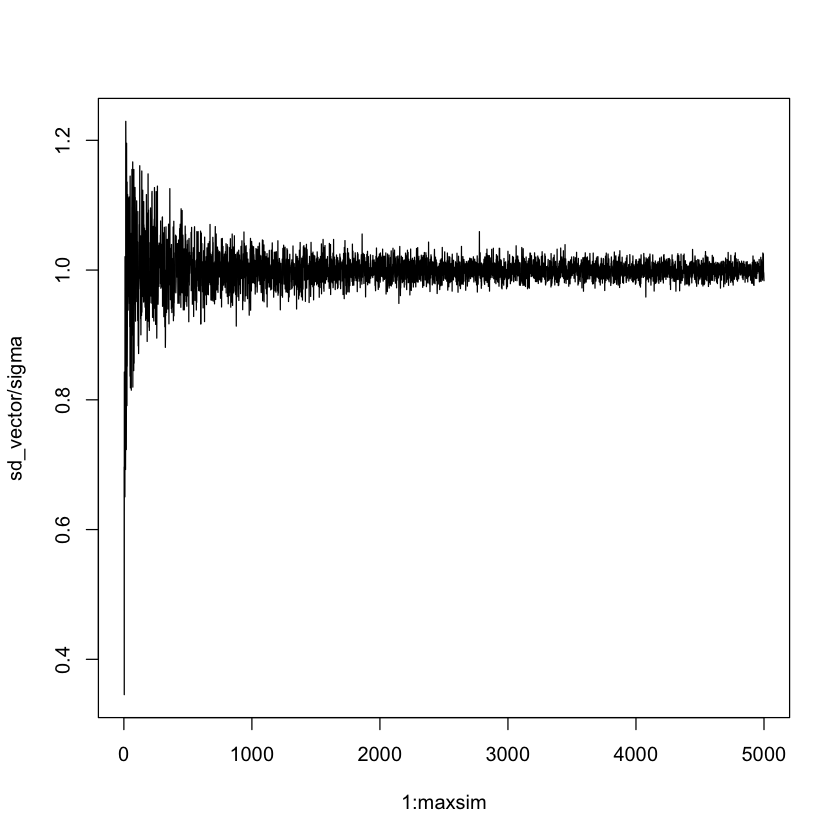

In [1]:
###INPUT
xi=0.005
sigma=0.05
maxsim=5000

## define function
simulate_normal<-function(xi,sigma,sim){
    random<-rnorm(mean=xi,sd=sigma,n=sim)
    
    result=c(mean(random),sd(random))
    return(result)
}

### run function
mean_vector<-vector(length=maxsim)
sd_vector<-vector(length=maxsim)
for (i in 1:maxsim){
    temp<-simulate_normal(xi,sigma,i)
    mean_vector[i]<-temp[1]
    sd_vector[i]<-temp[2]
}
    
###plot
plot(1:maxsim,mean_vector,type="l")
plot(1:maxsim,sd_vector,type="l")

plot(1:maxsim,mean_vector/xi,type="l")
plot(1:maxsim,sd_vector/sigma,type="l")

## Section 2.2

### Exercise 2.1

In [2]:
### define function
draw_random<-function(m,xi,sigma){
    eps <- rnorm(m)
    R <- exp(xi+sigma*eps[1:m])-1 
    
    return(R)
}


### Input

xi <- 0.005
sigma <- 0.05

m1 <- 100
m2 <- 1000
m3 <- 10000

##run function
R1 <- draw_random(m1,xi,sigma)
R2 <- draw_random(m2,xi,sigma)
R3 <- draw_random(m3,xi,sigma)

### Output simulation
c(mean(R1),mean(R2),mean(R3))
c(sd(R1),sd(R2),sd(R3))

#### Real parameters
exp(xi+0.5*sigma^2)-1
exp(xi+0.5*sigma^2)*sqrt(exp(sigma^2)-1)

[1] 0.001368318 0.006212107 0.005884599

[1] 0.05835621 0.04854243 0.05029137

[1] 0.006269572

[1] 0.05034494

### Exercise 2.2

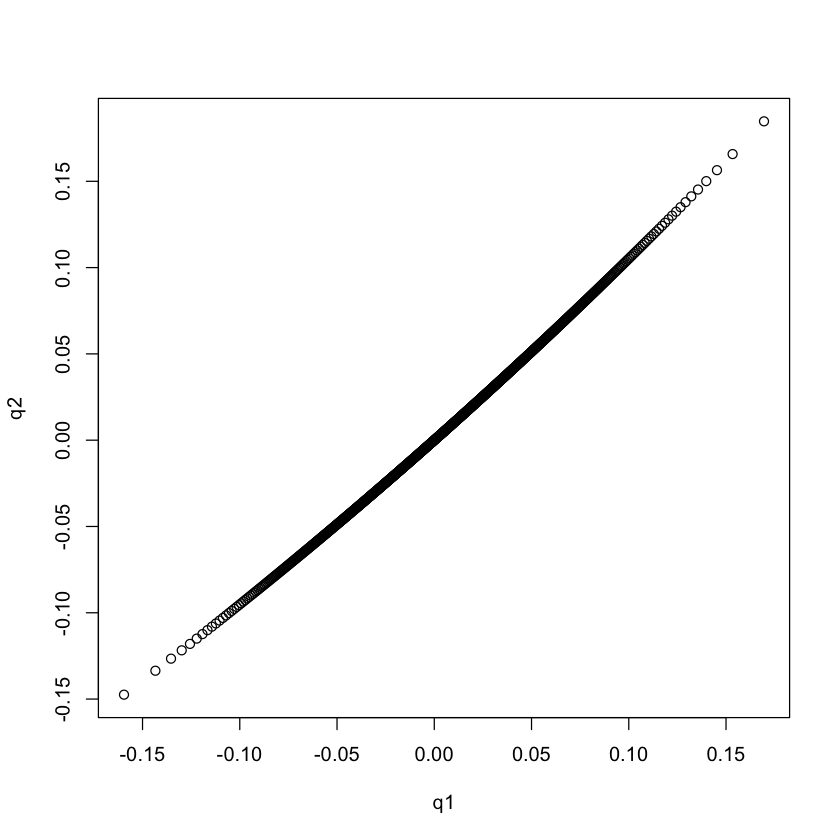

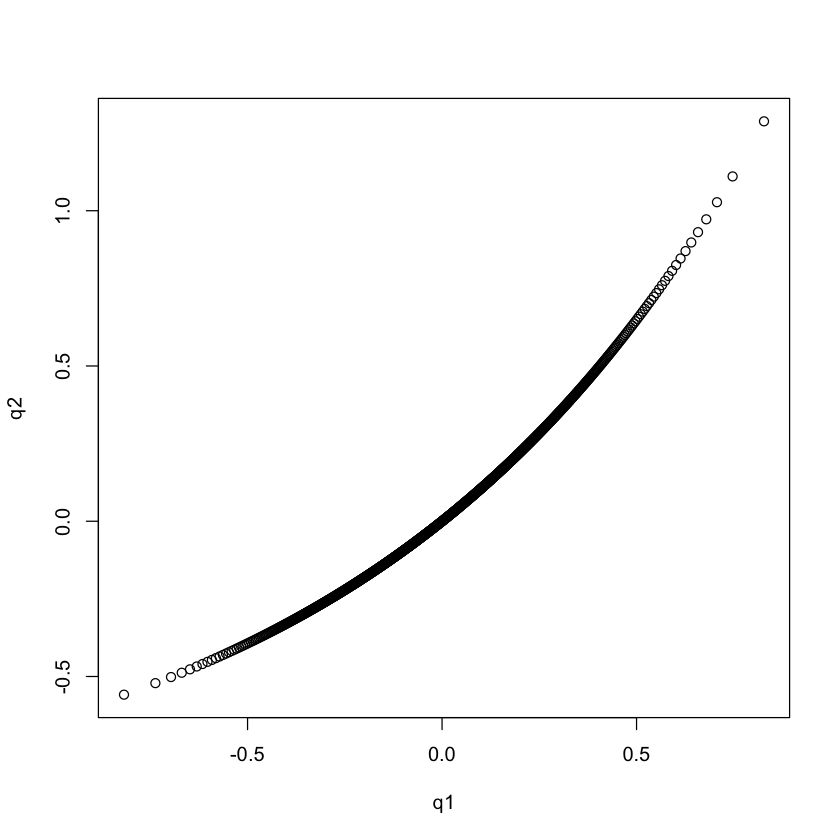

In [3]:
#DEFINE FUNCTION

plot_QQ<-function(n,xi,sigma){
    #define grid
    u <- (1:n-0.5)/n

    # calculate quantiles frim the distribution
    q1 <- xi+sigma*qnorm(u)
    q2 <- exp(xi+sigma*qnorm(u))-1

    #plot
    return(plot(q1,q2))
}



### INPUT
xi <- 0.005
sigma <- 0.05
n <- 1000

### Run plot_QQ
plot_QQ(n,xi,sigma)

## Redefine sigma
sigma <- 0.25

### Plot again
plot_QQ(n,xi,sigma)



### Exercise 2.4

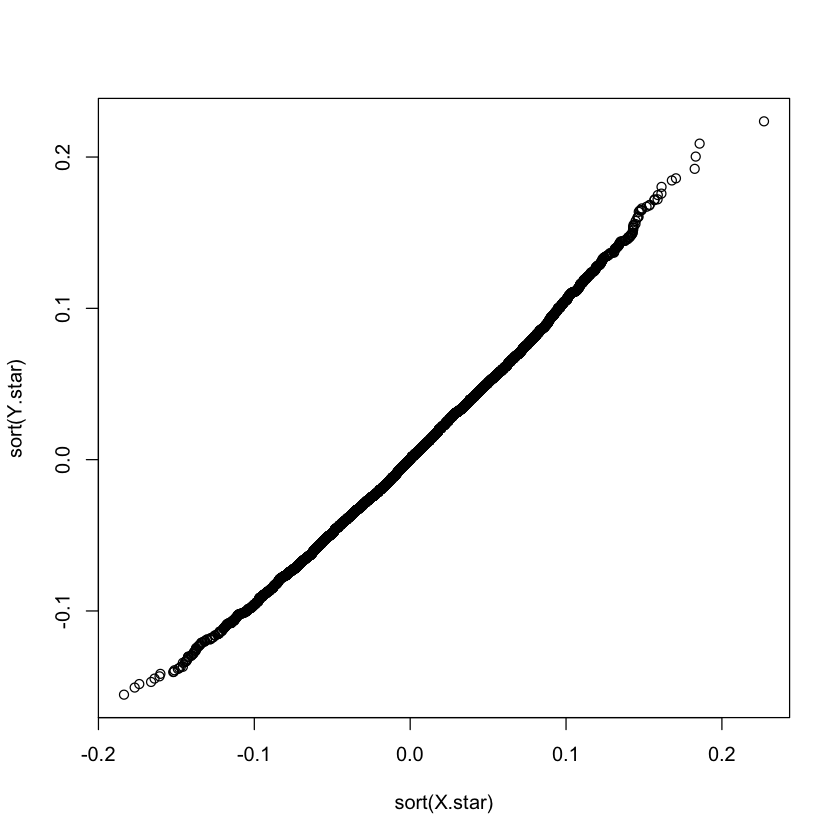

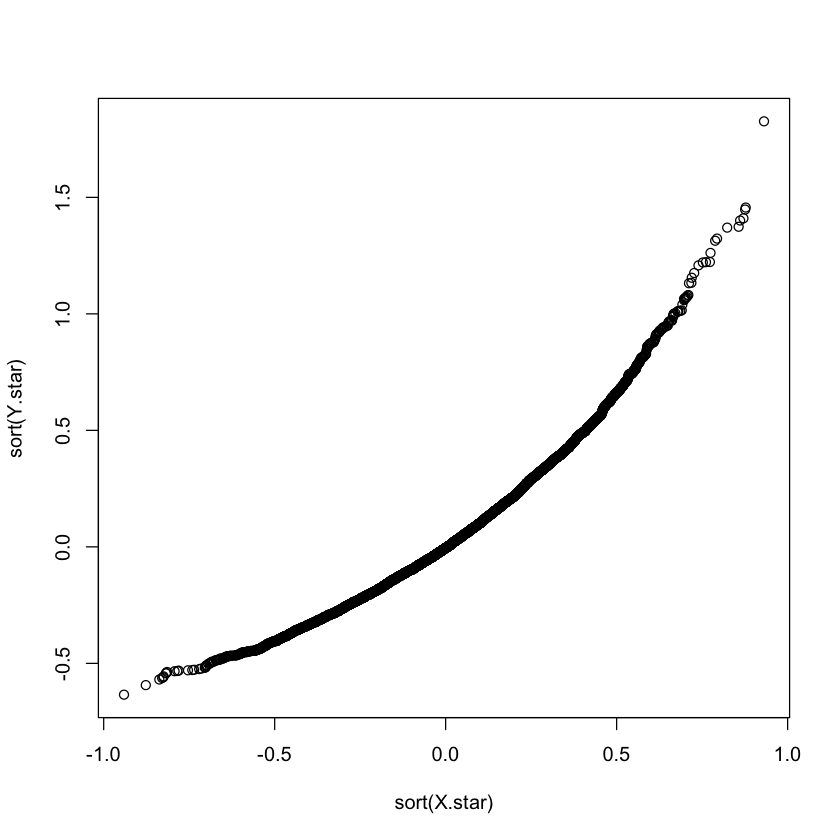

In [4]:
## Define function
simulate_returns<-function(xi,sigma,m){
    X.star <- xi+sigma*rnorm(m)
    Y.star <- exp(xi+sigma*rnorm(m))-1

    return(plot(sort(X.star),sort(Y.star)))
}


## INPUT
xi <- 0.005
sigma <- 0.05
m <- 10000

### Run function
simulate_returns(xi,sigma,m)

### Redefine sigma
sigma <- 0.25

### Rerun function
simulate_returns(xi,sigma,m)

### Exercise 2.5

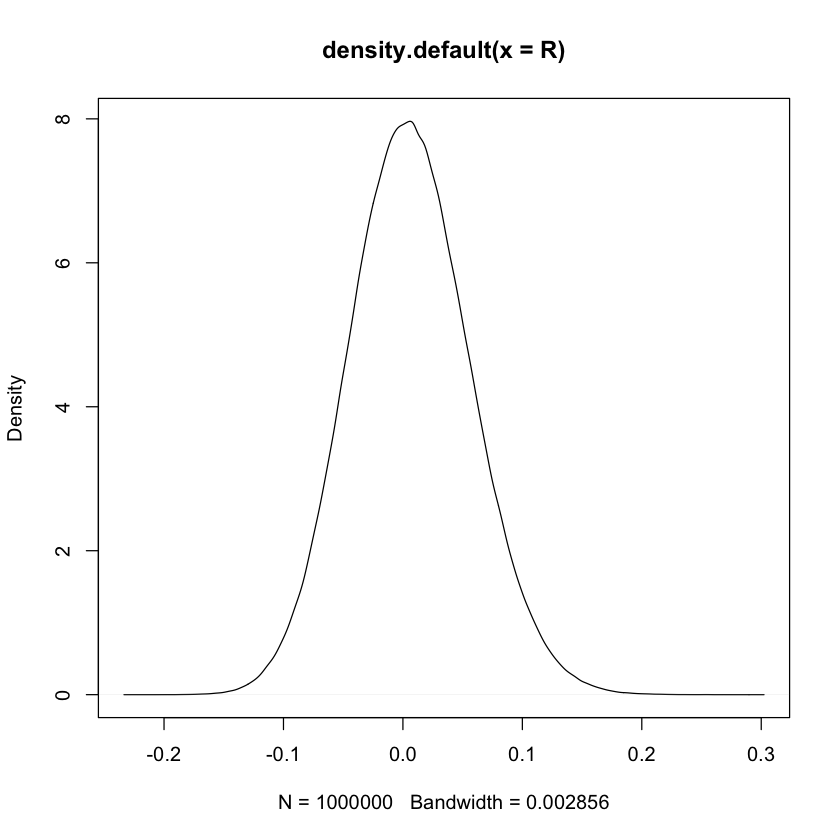

In [12]:
### INPUT
xi <- 0.005
sigma <- 0.05
m <- 1000000

###Draw random numbers
eps <- rnorm(m)
R <- exp(xi+sigma*eps)-1

#Plot denisity
plot_dens<-density(R)
plot(plot_dens)



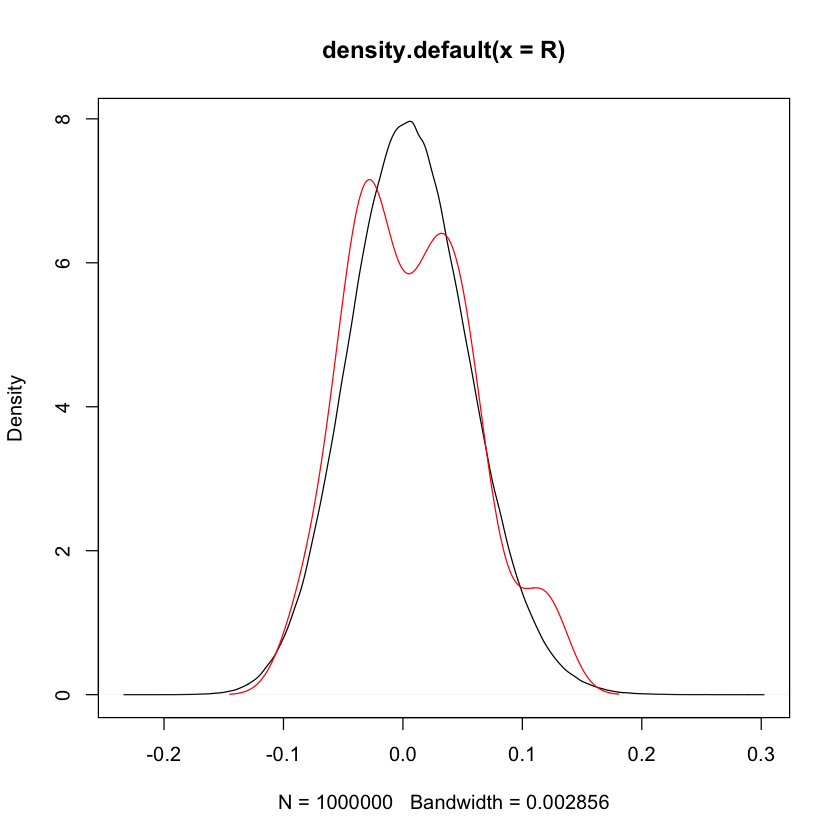

In [15]:
##Add plot from first 100 sims
plot(plot_dens)
lines(density(R[1:100]),col=2)

In [16]:
bw <- c(0.005,0.012,0.015,0.018,0.025)
plot(density(R),ylim=c(0,10))
lines(density(R[1:100],bw=bw[1]),col=2)
lines(density(R[1:100],bw=bw[2]),col=3)
lines(density(R[1:100],bw=bw[3]),col=4)
lines(density(R[1:100],bw=bw[4]),col=5)
lines(density(R[1:100],bw=bw[5]),col=6)
legend(0.15,8,legend=c("all sim.",paste("bw =",bw)),lty=rep(1,6),col=1:6)

### Exercise 2.6

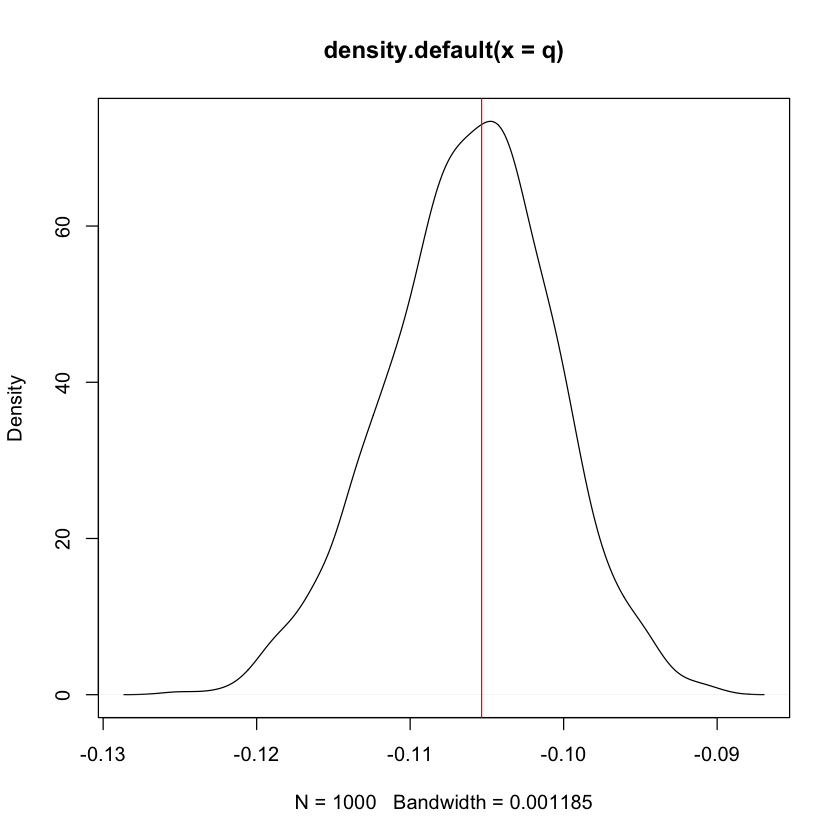

In [38]:
### Define function
simulate_quantile<-function(m,mb,xi,sigma,yps){
    eps <- matrix(rnorm(m*mb),m,mb)
    R <- exp(xi+sigma*eps)-1
    q <- apply(R,2,sort)[yps*m,]
    return(q)
}

###INPUTS
xi <- 0.005
sigma <- 0.05
yps <- 0.01

m <- 1000
mb <- 1000

### Run function on inputs
q<-simulate_quantile(m,mb,xi,sigma,yps)
plot(density(q))
abline(v=exp(xi+sigma*qnorm(yps))-1,col=2)

### Exercise 2.9

$`SIMULATED EXCESS KURT`
[1] 0.393773

$`TRUE EXCESS KURT`
[1] 0.04014412

$Plot
NULL

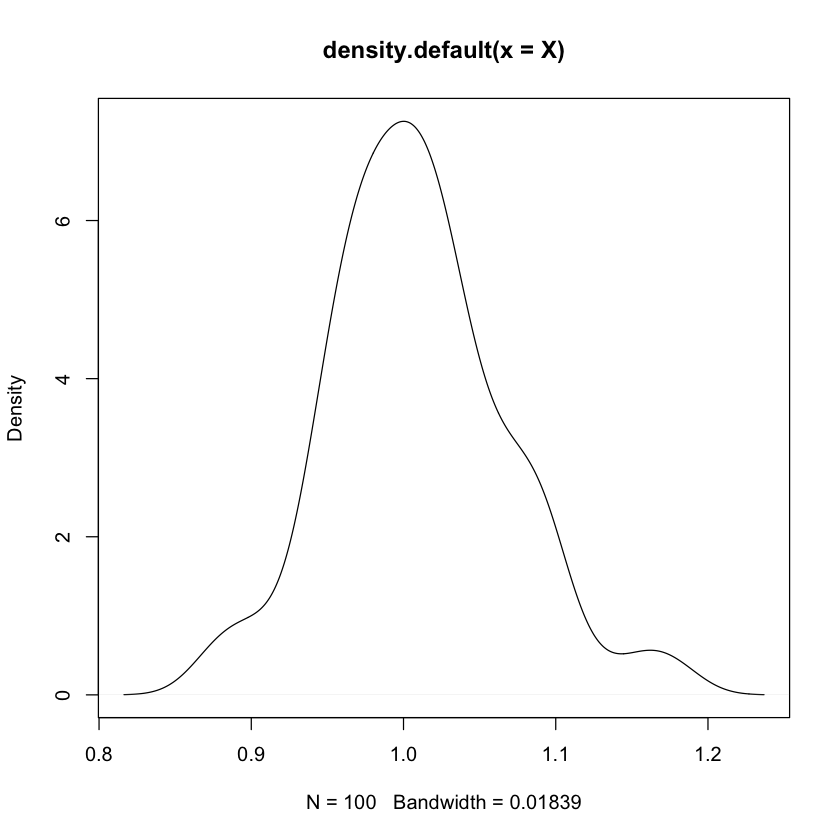

$`SIMULATED EXCESS KURT`
[1] -0.01262652

$`TRUE EXCESS KURT`
[1] 0.04014412

$Plot
NULL

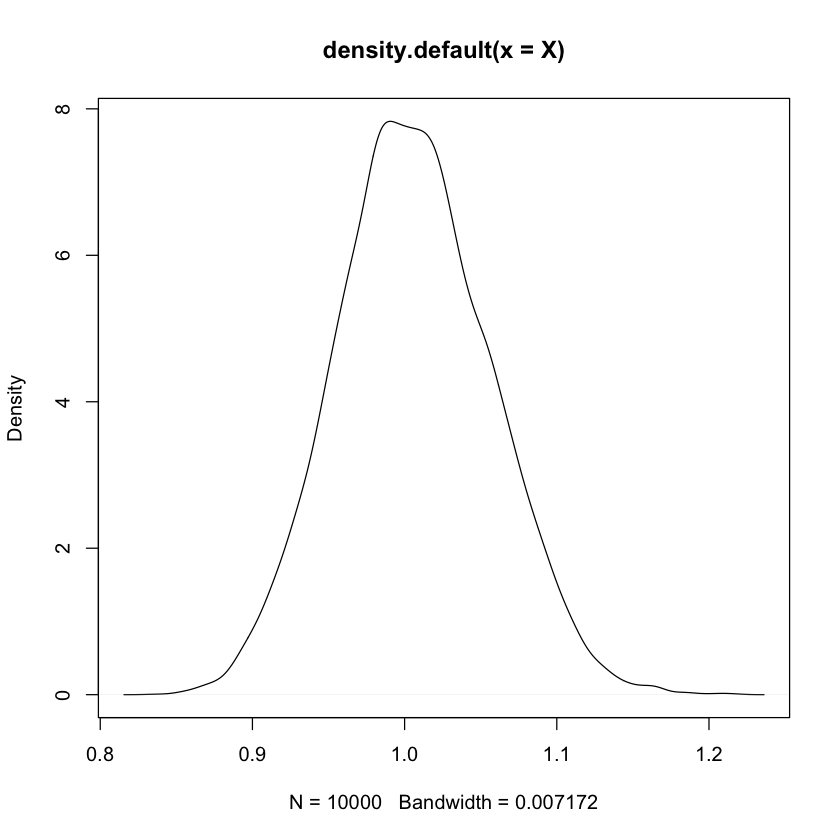

$`SIMULATED EXCESS KURT`
[1] 0.03903167

$`TRUE EXCESS KURT`
[1] 0.04014412

$Plot
NULL

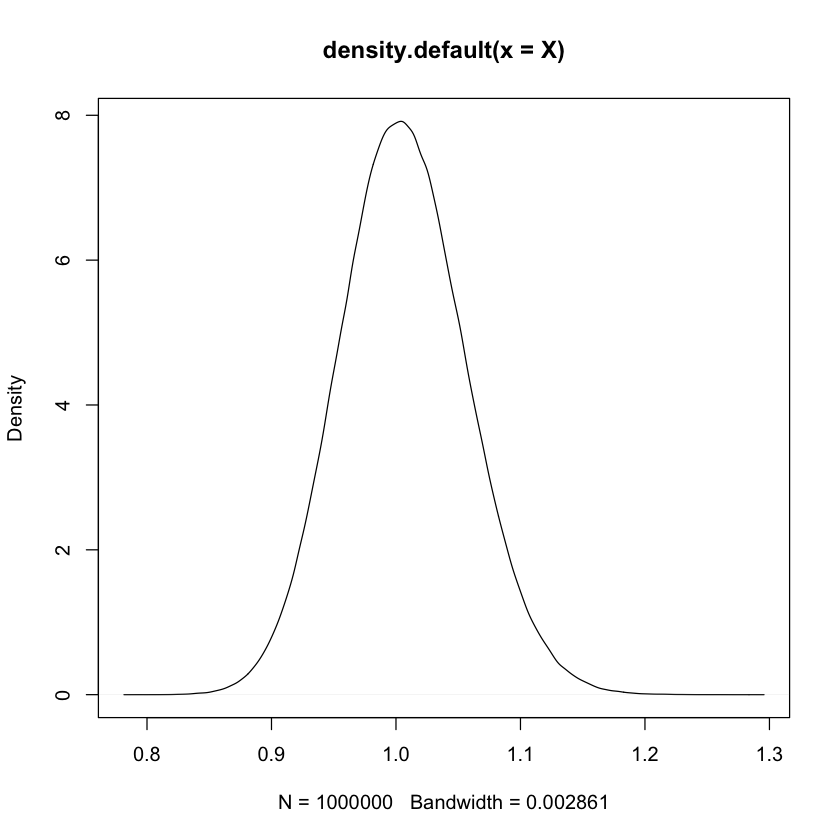

In [26]:
### Define function
sim_kurtosis<-function(xi,sigma,n){
    eps <- rnorm(n)
    X <- exp(xi+sigma*eps[1:n])
    
    result<-list("SIMULATED EXCESS KURT"=mean((X-mean(X))^4)/(var(X))^2-3, 
        "TRUE EXCESS KURT"=exp(4*sigma^2)+2*exp(3*sigma^2)+3*exp(2*sigma^2)-6,
        "Plot"=plot(density(X)))
    
    return(result)
}

### INPUTS
xi <- 0.005
sigma <- 0.05

n_1 <- 100
n_2 <- 10000
n_3 <- 1000000

#RUN function on inputs
sim_kurtosis(xi,sigma,n_1)
sim_kurtosis(xi,sigma,n_2)
sim_kurtosis(xi,sigma,n_3)

$`SIMULATED EXCESS KURT`
[1] 10.42216

$`TRUE EXCESS KURT`
[1] 110.9364

$Plot
NULL

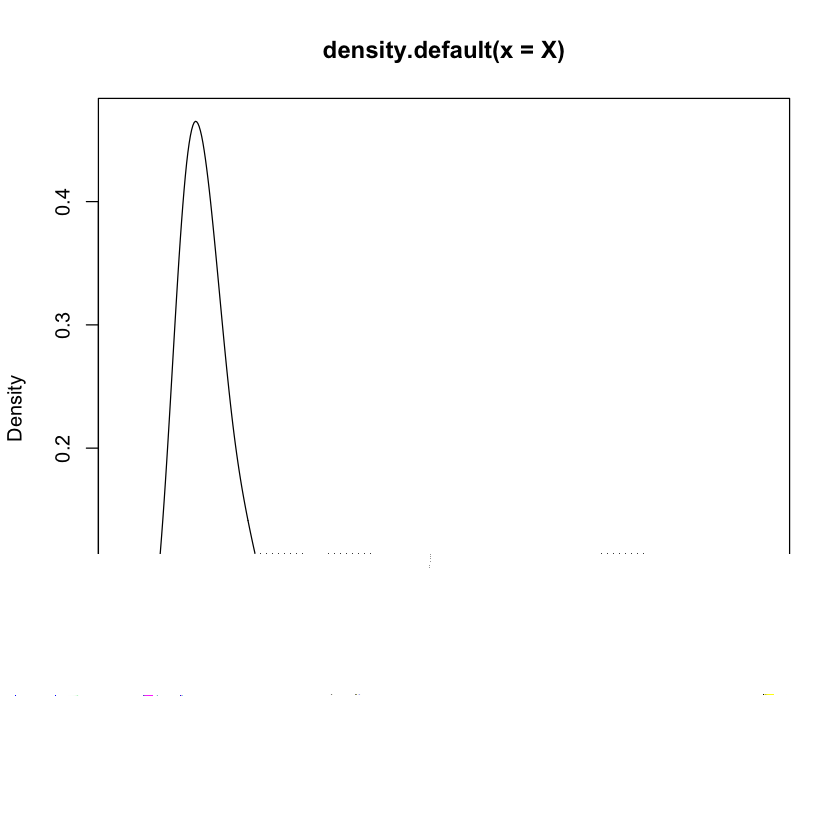

$`SIMULATED EXCESS KURT`
[1] 80.82025

$`TRUE EXCESS KURT`
[1] 110.9364

$Plot
NULL

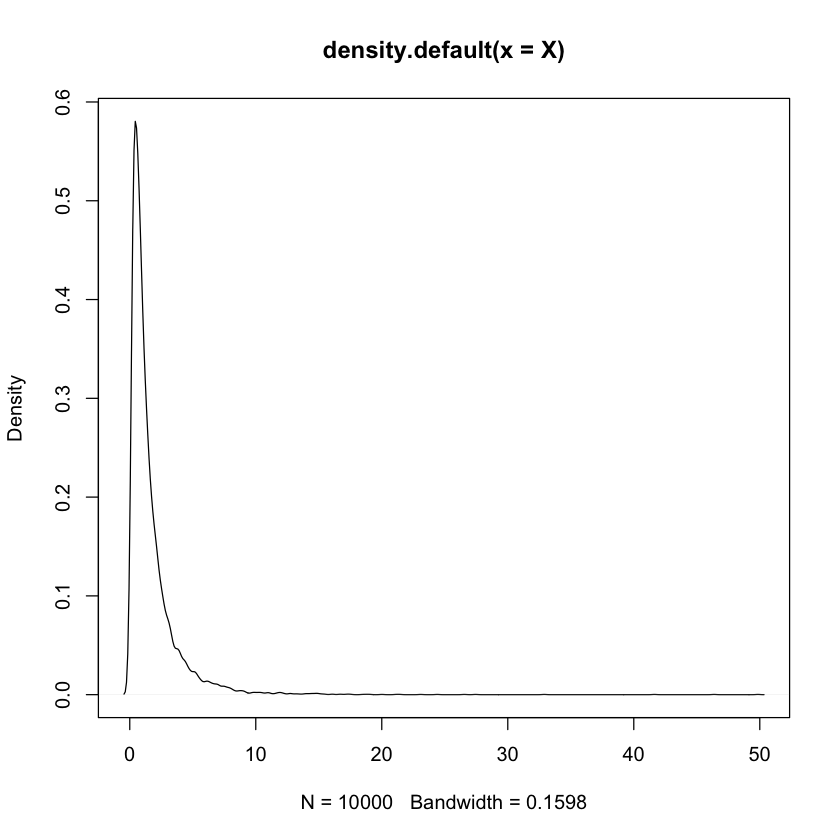

$`SIMULATED EXCESS KURT`
[1] 79.45945

$`TRUE EXCESS KURT`
[1] 110.9364

$Plot
NULL

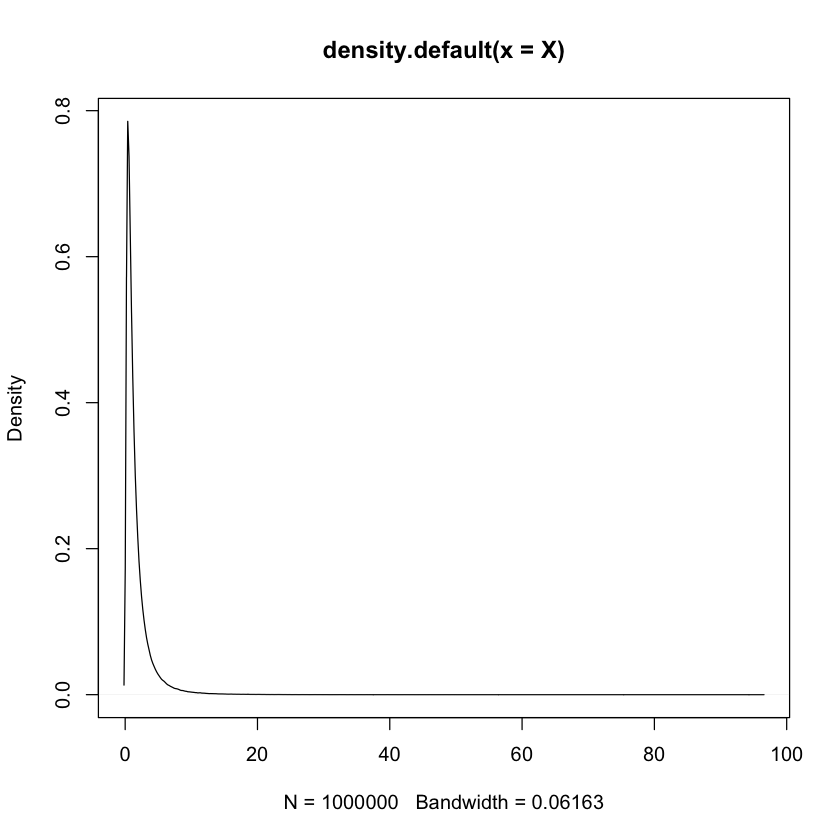

In [27]:
### INPUTS
xi <- 0
sigma <- 1

n_1 <- 100
n_2 <- 10000
n_3 <- 1000000

#RUN function on inputs
sim_kurtosis(xi,sigma,n_1)
sim_kurtosis(xi,sigma,n_2)
sim_kurtosis(xi,sigma,n_3)

## Section 2.3

### Exercise 2.10

In [43]:
### Define sampler

sampler_cauchy<-function(m,beta){
    U <- runif(m)
    X <- beta*tan(pi*(U[1:m]-0.5))
    
    return(X)
}


##INPUTS
beta <- 1
m1 <- 100
m2 <- 1000
m3 <- 10000
m4 <- 100000

#Run function
X1 <- sampler_cauchy(m1,beta)
X2 <- sampler_cauchy(m2,beta)
X3 <- sampler_cauchy(m3,beta)
X4 <- sampler_cauchy(m4,beta)

mean(X1)
mean(X2)
mean(X3)
mean(X4)

[1] 0.703263

[1] 1.142642

[1] 0.6288857

[1] 14.24357

### Exercise 2.12

In [41]:
### define function

simulate_truncated<-function(xi,sigma,m,a){
    p <- 1-pnorm(a,xi,sigma)
    U <- runif(m)
    X <- qnorm(1-p[1]+p[1]*U)
    
    return(X)
}


#define inputs
xi <- 0
sigma <- 1
m <- 10000
a <- 1:3

#run dunction
X1 <- simulate_truncated(xi,sigma,m,a[1])
X2 <- simulate_truncated(xi,sigma,m,a[2])
X3 <- simulate_truncated(xi,sigma,m,a[3])

c(mean(X1),mean(X2),mean(X3))
c(sd(X1),sd(X2),sd(X3))

[1] 1.528376 2.372406 3.286327

[1] 0.4465995 0.3332538 0.2675445

## Section 2.4
### Exercise 2.18

$MEAN
[1] 0.9976053

$PLOT
NULL

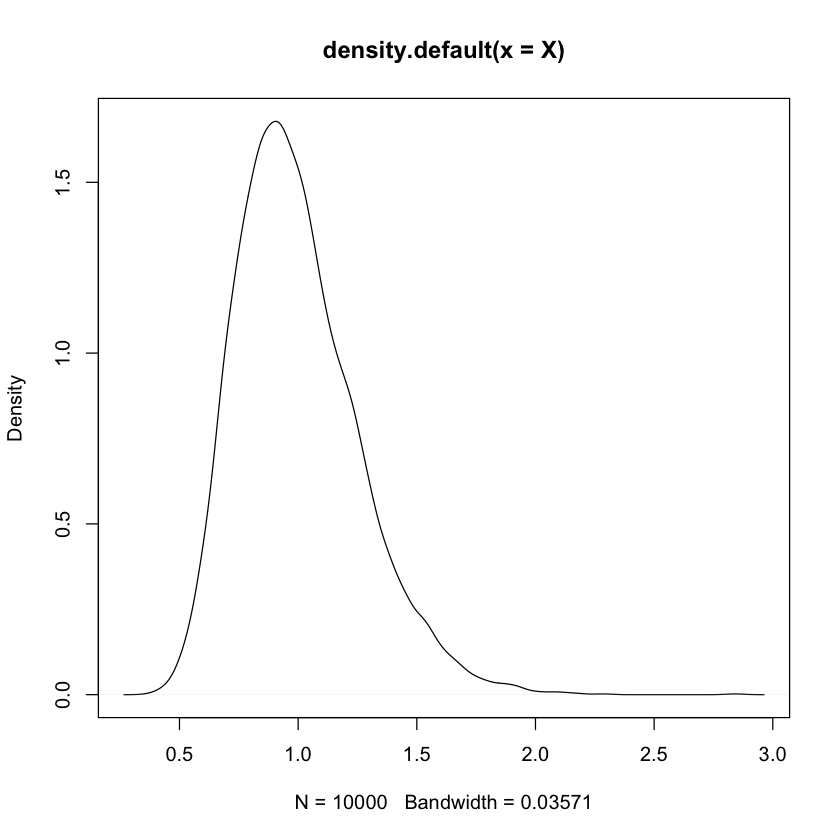

$MEAN
[1] 0.997806

$PLOT
NULL

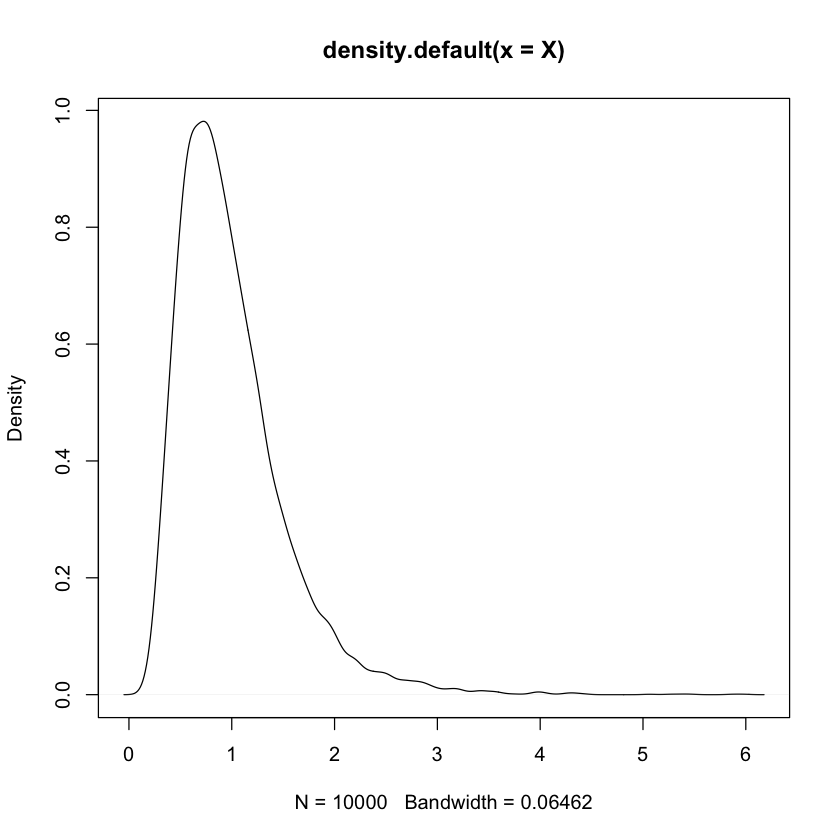

$MEAN
[1] 1.020824

$PLOT
NULL

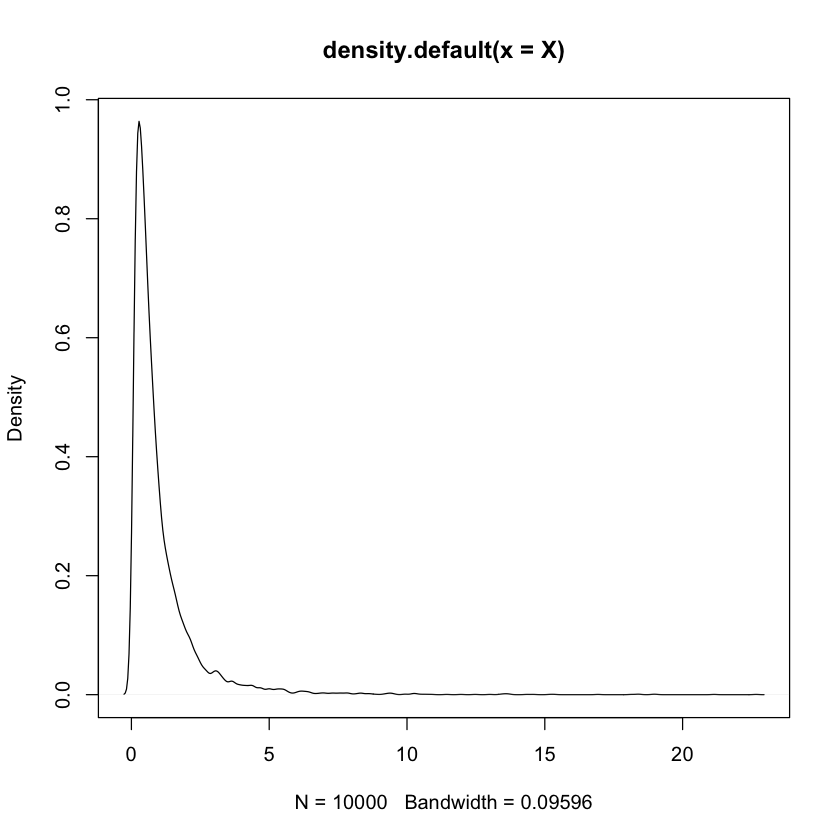

In [39]:
## define function

simulate_risk_neutral_lognormal<-function(xi,sigma,m){
    eps <- rnorm(m)
    X <- xi*exp(-sigma**2/2+sigma*eps)
    
    result<-list("MEAN"=mean(X),
        "PLOT"=plot(density(X)))
    return(result)
}


#Define inputs
xi <- 1
sigma_1 <- 0.25
sigma_2<- 0.5
sigma_3<-1
m <- 10000

simulate_risk_neutral_lognormal(xi,sigma_1,m)


simulate_risk_neutral_lognormal(xi,sigma_2,m)
simulate_risk_neutral_lognormal(xi,sigma_3,m)